# EDA on Data Science Job Salaries

## About the dataset
The Data Science Job Salaries Dataset contains 11 columns, each are:

| Column Name | Description   |
|------|:------|
|   work_year  | The year the salary was paid.|
|   experience_level  | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director|
|   employment_type  | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance.|
|   job_title  | The role worked in during the year.|
|   salary  | The total gross salary amount paid.|
|   salary_currency  | The currency of the salary paid as an ISO 4217 currency code.|
|   salaryinusd  | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).|
|   employee_residence  | Employee's primary country of residence in during the work year as an ISO 3166 country code.|
|   remote_ratio  | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)|
|   company_location  | The country of the employer's main office or contracting branch as an ISO 3166 country code.|
|   company_size  | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)|

## Objectives
1. Overview of every features in the dataset
2. Salaries analysis
3. Coconut

## Table of Contents
* [1. Import libraries](#import)
* [2. Univariate Analysis](#univariate)
    * [2.1 Categorical Columns](#Categorical)
        * [2.1.1 Job Titles](#JobTitles)
        * [2.1.2 Experience Level](#ExperienceLevel)
        * [2.1.3 Employment Type](#EmploymentType)
        * [2.1.4 Employee Residence & Company Location](#EmployeeResidence&CompanyLocation)
        * [2.1.5 Company Size](#CompanySize)
    * [2.2 Numerical Columns](#Numerical)
        * [2.2.1 Salary in USD](#SalaryinUSD)
        * [2.2.2 Work Year](#WorkYear)
        * [2.2.3 Remote Ratio](#RemoteRatio)
* [3. Salaries Analysis](#SalariesAnalysise)

# 1. Import libraries<a class="anchor" id="import"></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud

In [5]:
#read dataset, remove first column as it's useless
df = pd.read_csv("ds_salaries.csv", index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
#total number of rows and columns
df.shape

(607, 11)

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
#check for null values
df.isnull().values.any()

False

# 2. Univariate Analysis<a class="anchor" id="univariate"></a>

In this section, we'll be exploring each features in the dataset and try to get some useful information here.

We will look at the analysis on categorical columns and numeric columns.

## 2.1 Categorical Columns<a class="anchor" id="Categorical"></a>

There are 6 categorical columns in the dataset:

* Job Titles
* Experiece Level
* Employment Type
* Employee Resdience
* Company Location
* Company Size

### 2.1.1 Job Titles<a class="anchor" id="JobTitles"></a>
First, we want to see how many unique job titles are here:

In [9]:
print("Number of unique job titles: ", df['job_title'].nunique())

Number of unique job titles:  50


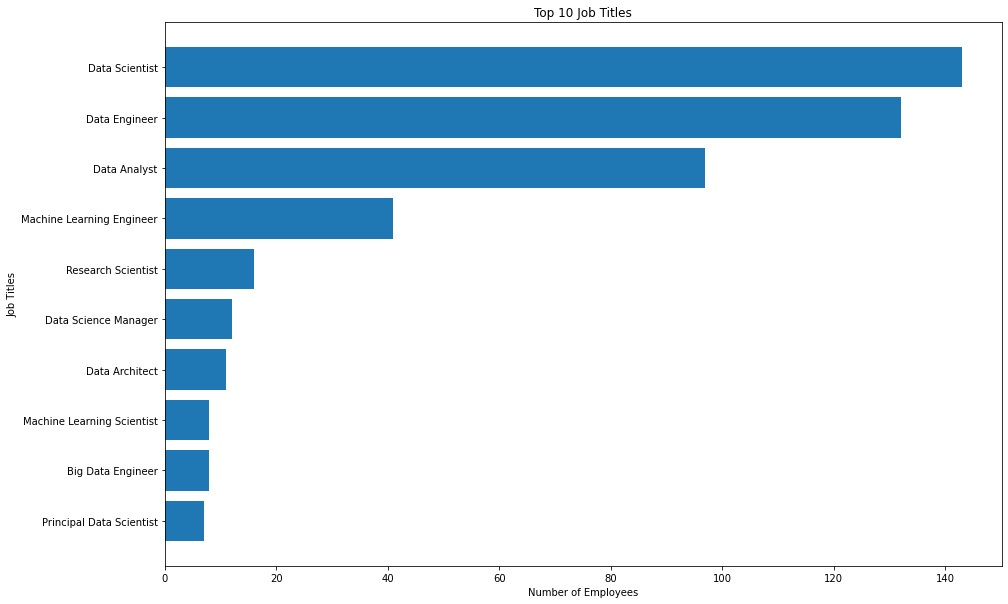

In [10]:
top10_job = df['job_title'].value_counts()[:10]
top10_job.sort_values(inplace=True)

fig = plt.figure(figsize = (15, 10))
plt.barh(top10_job.index, top10_job.values)
plt.xlabel("Number of Employees")
plt.ylabel("Job Titles")
plt.title("Top 10 Job Titles")
plt.show()

In here we notice that Data scientist, data engineer and data analyst are the top 3 frequent job titles.

### 2.1.2 Experience Level<a class="anchor" id="ExperienceLevel"></a>

According to definitions of the experience level:
* EN refers to **Entry-level / Junior**
* MI refers to **Mid-level / Intermediate**
* SE refers to **Senior-level / Expert**
* EX refers to **Executive-level / Director**

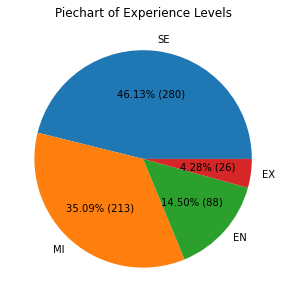

In [11]:
labels = df['experience_level'].value_counts().index
sizes = df['experience_level'].value_counts().values

fig = plt.figure(figsize = (5, 5))

plt.pie(sizes, labels = labels, autopct=lambda p:f'{p:.2f}% ({p*sum(sizes)/100 :.0f})')
plt.title("Piechart of Experience Levels")
plt.show()

From the above pie chart, we notice that **46%** of the employees are Senior-level/Expert, about **35%** are Mid-level/Intermediate ranked the next, and there're only **4.28%** of Executive-level/Directior.

### 2.1.3 Employment Type<a class="anchor" id="EmploymentType"></a>

According to definitions, there are 4 employment types here, each are:
* PT: Part-time
* FT: Full-time
* CT: Contract
* FL: Freelance

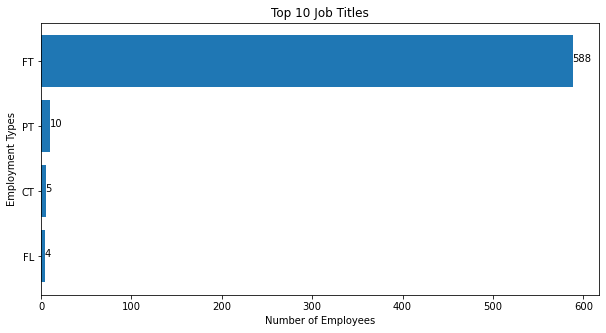

In [12]:
emp_type = df['employment_type'].value_counts()
emp_type.sort_values(inplace=True)

fig = plt.figure(figsize = (10, 5))

plt.barh(emp_type.index, emp_type.values)

for index, value in enumerate(emp_type.values):
    plt.text(value, index, str(value))
    
plt.xlabel("Number of Employees")
plt.ylabel("Employment Types")
plt.title("Top 10 Job Titles")
plt.show()

Most of employee types are full-time.

### 2.1.4 Employee Residence & Company Location<a class="anchor" id="EmployeeResidence&CompanyLocation"></a>

We'll explore employee's residence and company location.

In [28]:
top10_employee_location = df['employee_residence'].value_counts()[:10]
top_10_company_location = df['company_location'].value_counts()[:10]
top10_employee_location.sort_values(inplace=True)
top_10_company_location.sort_values(inplace=True)

fig = plt.figure(figsize = (15, 10))
df.pivot("employee_residence", "company_location", df['employee_residence'].value_counts()).plot(kind='bar')

KeyError: "None of [Int64Index([332,  44,  30,  29,  25,  18,  15,  13,   7,   6,   6,   6,   5,\n              4,   4,   4,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,\n              2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,\n              1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,\n              1,   1,   1,   1,   1],\n           dtype='int64')] are in the [columns]"

<Figure size 1080x720 with 0 Axes>

### 2.1.5 Company Size<a class="anchor" id="CompanySize"></a>

## 2.2 Numerical Columns<a class="anchor" id="Numerical"></a>

### 2.2.1 Salary in USD<a class="anchor" id="SalaryinUSD"></a>

### 2.2.2 Work Year<a class="anchor" id="WorkYear"></a>

### 2.2.3 Remote Ratio<a class="anchor" id="RemoteRatio"></a>

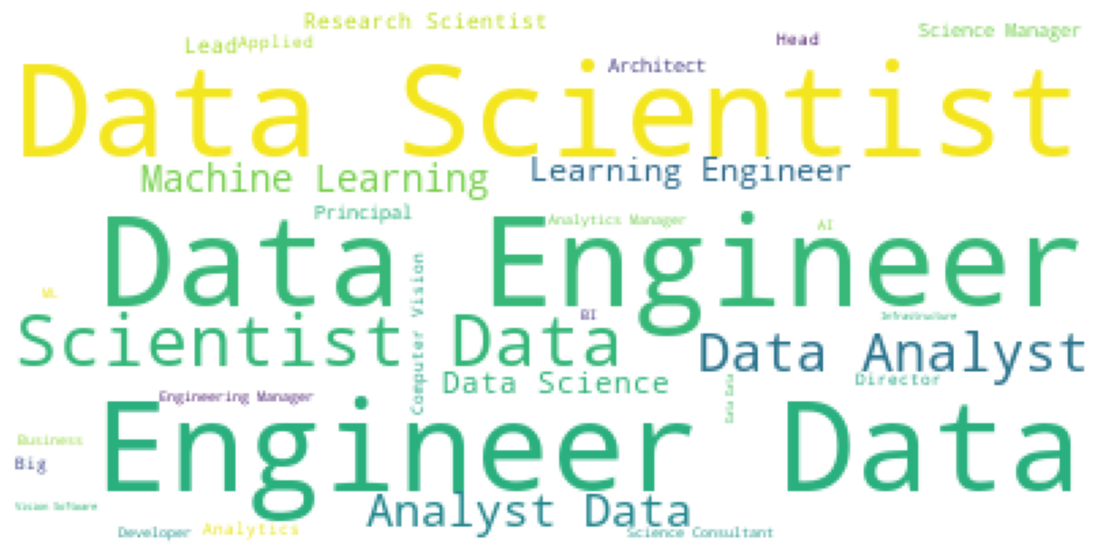

In [14]:
#See what kinds of job titles here we have
#df.job_title.value_counts()
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.job_title))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

<AxesSubplot:>

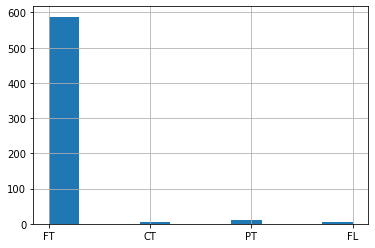

In [15]:
#employment_type
df.employment_type.hist()

<AxesSubplot:>

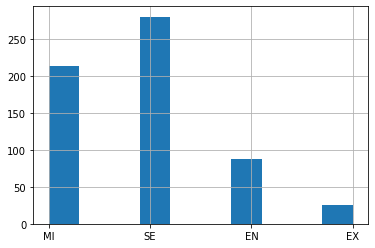

In [16]:
#Numbers the levels of jobs 
df.experience_level.hist()

In [17]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


<AxesSubplot:>

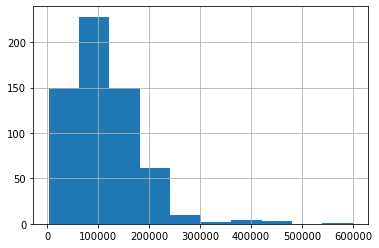

In [18]:
#Looking at salaries in USD
df.salary_in_usd.hist()

In [19]:
#Correlation between each quantative columns
#pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['employee_residence', 'job_title'], aggfunc={'salary_in_usd':np.mean}).sort_values('employee_residence', ascending = 'False')

salary_in_usd
employee_residence job_title                                        
AE                 Lead Data Scientist                      115000.0
                   Machine Learning Engineer                 92500.0
AR                 Data Science Engineer                     60000.0
AT                 Data Engineer                             74130.0
                   Data Scientist                            91237.0
...                                                              ...
US                 Computer Vision Software Engineer         70000.0
                   Staff Data Scientist                     105000.0
VN                 Data Analytics Engineer                   50000.0
                   Applied Machine Learning Scientist        38400.0
                   Data Scientist                             4000.0

[196 rows x 1 columns]

In [20]:
#
#pd.pivot_table(df[df.job_title == 'Data Scientist'], index = ['employee_residence'], aggfunc={'salary_in_usd':np.mean}).sort_values('employee_residence', ascending = 'False')

# Univariate Analysis